In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\data_science\framingham.csv")

In [7]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.drop(columns="education",inplace=True,axis=1)

In [15]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

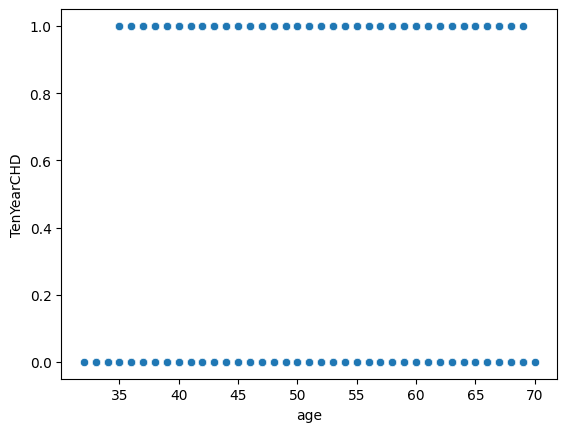

In [19]:
sns.scatterplot(x="age",y="TenYearCHD",data=df)
plt.show()

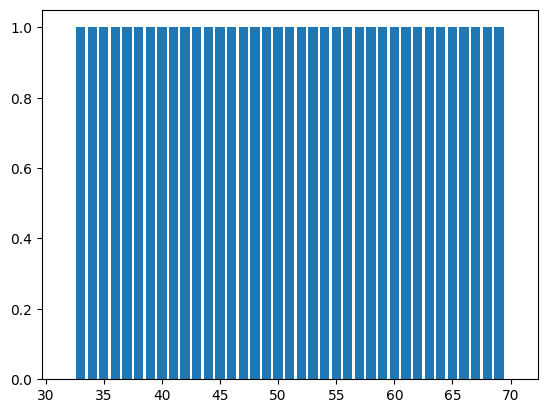

In [33]:
plt.bar(x="age",height="male",data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

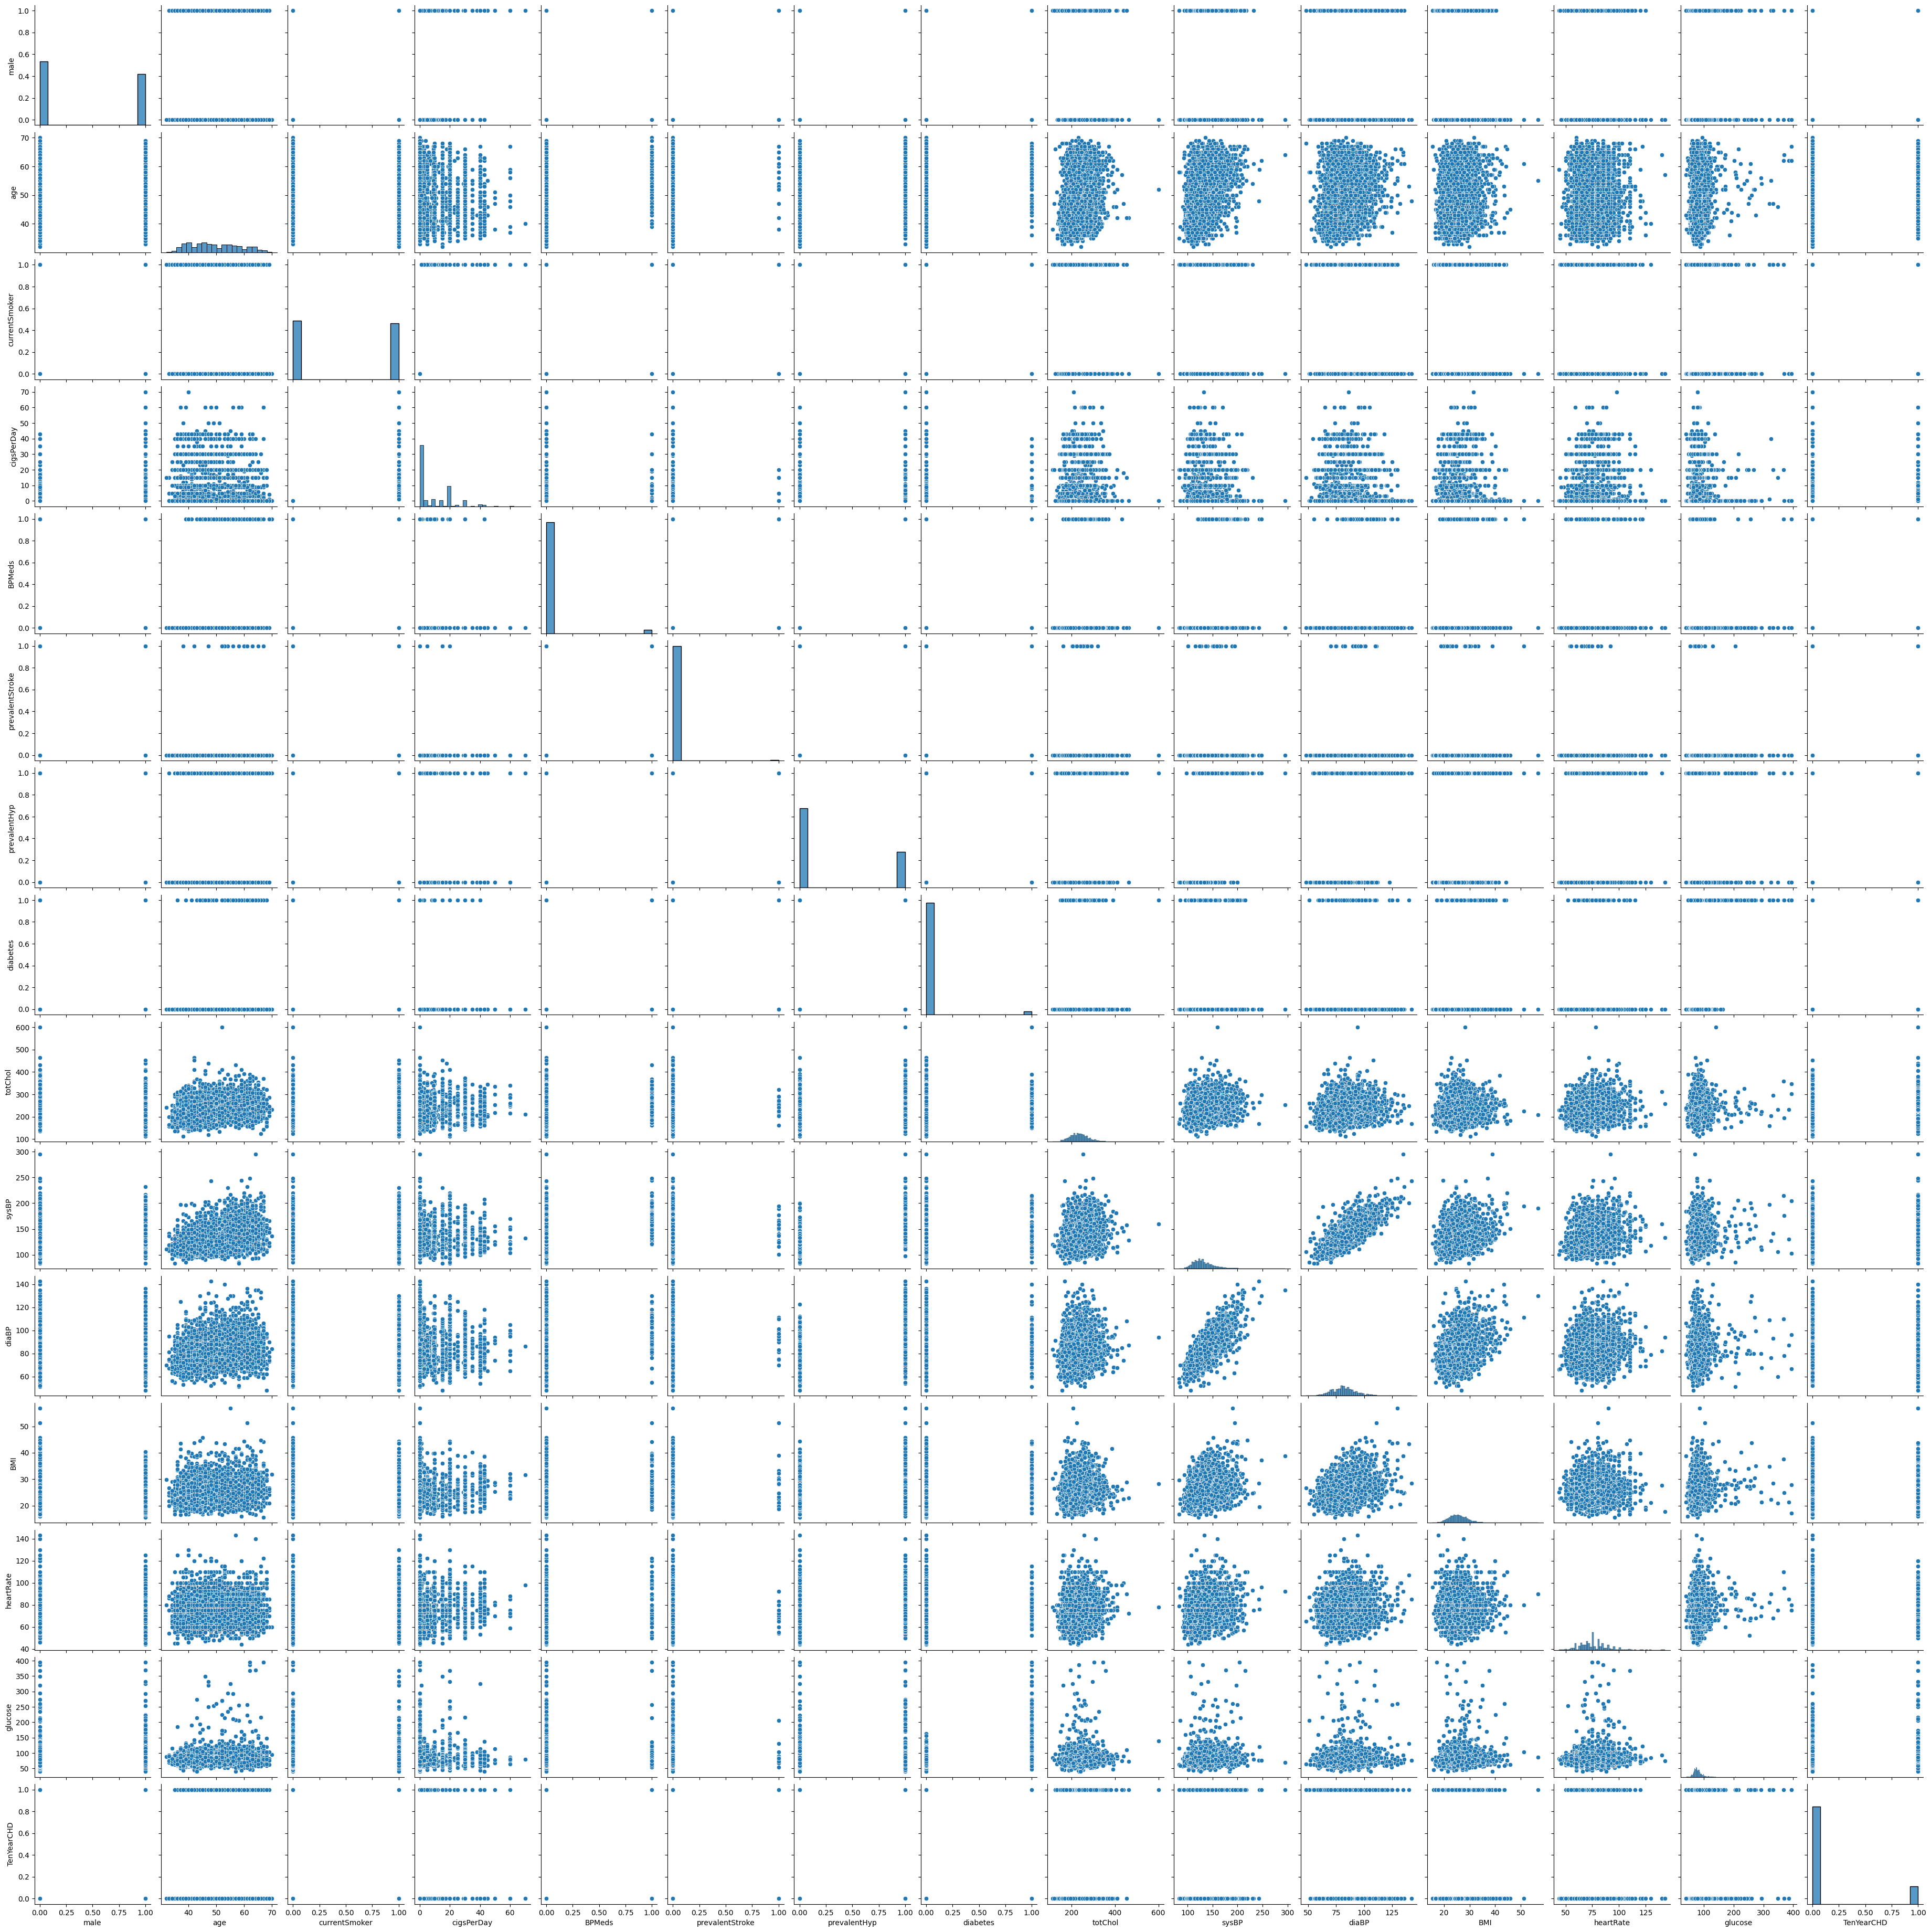

In [35]:
sns.pairplot(data=df)
plt.show

In [21]:
x=df.iloc[:,:-1]
y=df["TenYearCHD"]

In [23]:
y.value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

data imbalance

# random sampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [26]:
ros=RandomOverSampler()
r_x,r_y=ros.fit_resample(x,y)
rus=RandomUnderSampler()
rx,ry=rus.fit_resample(x,y)

In [27]:
r_y.value_counts(),ry.value_counts()

(TenYearCHD
 0    3101
 1    3101
 Name: count, dtype: int64,
 TenYearCHD
 0    557
 1    557
 Name: count, dtype: int64)

In [31]:
dataset=pd.DataFrame(r_x,r_y)

In [33]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

# train test split

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(r_x,r_y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(rx,ry,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

# logistic regression

In [43]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(67.04270749395648, 65.32957065107841)

In [47]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr.score(xtest,ytest)*100,lr.score(xtrain,ytrain)*100

(61.88340807174888, 68.35016835016835)

In [51]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
lr.score(X_test,Y_test)*100,lr.score(X_train,Y_train)*100

(83.19672131147541, 85.30416951469583)

In [55]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [57]:
cf=confusion_matrix(Y_test,lr.predict(X_test))
cf1=confusion_matrix(y_test,lr.predict(x_test))
cf2=confusion_matrix(ytest,lr.predict(xtest))
cf,cf1,cf2

(array([[607,   3],
        [120,   2]], dtype=int64),
 array([[620,   2],
        [593,  26]], dtype=int64),
 array([[113,   2],
        [105,   3]], dtype=int64))

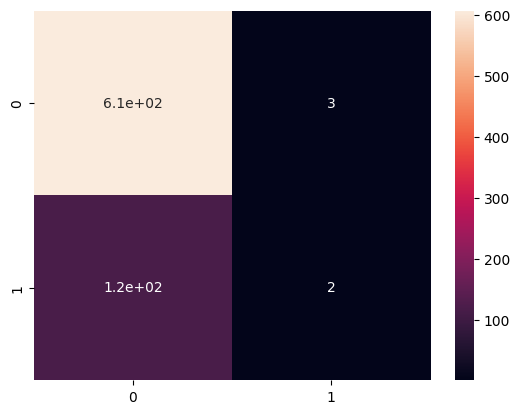

In [59]:
sns.heatmap(cf,annot=True)
plt.show()

# decision tree classification

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=None)
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# decision tree classification with over resample data

In [67]:
dtc.score(x_test,y_test)*100,dtc.score(x_train,y_train)*100

(92.10314262691378, 100.0)

# decision tree classification with imbalance data

In [70]:
dtc1=DecisionTreeClassifier(criterion='gini',max_depth=None)
dtc1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [72]:
dtc1.score(X_test,Y_test)*100,dtc1.score(X_train,Y_train)*100

(75.0, 100.0)

In [74]:
dtc12=DecisionTreeClassifier(criterion='gini',max_depth=None)
dtc12.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [76]:
dtc12.score(xtest,ytest)*100,dtc12.score(xtrain,ytrain)*100

(56.95067264573991, 100.0)

In [79]:
cf=confusion_matrix(y_test,dtc.predict(x_test))
cf

array([[526,  96],
       [  2, 617]], dtype=int64)

In [81]:
dtc.predict([[0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [83]:
cf1=confusion_matrix(Y_test,dtc.predict(X_test))
cf1

array([[584,  26],
       [  0, 122]], dtype=int64)

In [85]:
precision_score(Y_test,dtc1.predict(X_test)),recall_score(Y_test,dtc1.predict(X_test)),f1_score(Y_test,dtc1.predict(X_test))

(0.23008849557522124, 0.21311475409836064, 0.22127659574468084)

In [87]:
precision_score(y_test,dtc.predict(x_test)),recall_score(y_test,dtc.predict(x_test)),f1_score(y_test,dtc.predict(x_test))

(0.8653576437587658, 0.9967689822294022, 0.9264264264264265)

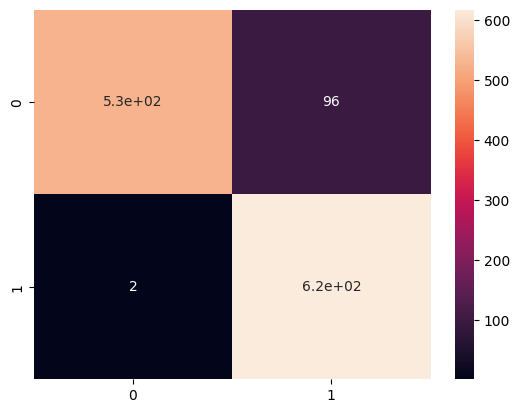

In [91]:
sns.heatmap(cf,annot=True)
plt.savefig("confusion matrix.jpg")
plt.show()

## to conclusion decision tree with over resample data is best